In [87]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud, ImageColorGenerator
import plotly.express as px
import seaborn as sns

In [65]:
# Color palette
theme = {
    "red": '#DB0000',
    "dark_gray": '#1E1E1E',
    "light_gray": "#969696",
}

In [66]:
netflix_df = pd.read_csv("data.csv")
netflix_df_copy = netflix_df

Let's have a fast look at how the data is shaped

In [67]:
netflix_df[1:10]

show_id     type  title           director  \
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   
6      s7    Movie    122    Yasir Al Yasiri   
7      s8    Movie    187     Kevin Reynolds   
8      s9    Movie    706      Shravan Kumar   
9     s10    Movie   1920       Vikram Bhatt   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   
7  Samuel L. Jackson, John Heard, Kelly Rowan, Cl...  United States   
8  Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...          India   
9  Rajneesh Duggal, Adah Sharma, Indraneil Sengup...          India   

          date_added  release_year rating  duration  \
1  December 23, 2016          2016  TV-MA    93 min   
2  December 20, 2018          2011      R    78 min   
3  November 16, 2017          2009  PG-13    80 min   
4    January 1, 2020          2008  PG-13   123 min   
5       July 1, 2017          2016  TV-MA  1 Season   
6       June 1, 2020          2019  TV-MA    95 min   
7   November 1, 2019          1997      R   119 min   
8      April 1, 2019          2019  TV-14   118 min   
9  December 15, 2017          2008  TV-MA   143 min   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
5    International TV Shows, TV Dramas, TV Mysteries   
6                Horror Movies, International Movies   
7                                             Dramas   
8                Horror Movies, International Movies   
9     Horror Movies, International Movies, Thrillers   

                                         description  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  
5  A genetics professor experiments with a treatm...  
6  After an awful accident, a couple admitted to ...  
7  After one of his high school students attacks ...  
8  When a doctor goes missing, his psychiatrist w...  
9  An architect and his wife move into a castle t...

We create a dictionary with all of the categories taken from the 'listed_in' column. This will be used to create a plot with the categories which appear most frequently in the Netflix catalogue.

In [68]:
categories = []
for i in range(len(netflix_df)):
    categories.extend(netflix_df.listed_in.iloc[i].split(','))

for i in range(len(categories)):
    categories[i] = categories[i].strip()
    
categories_dict = {}
for i in categories:
    categories_dict[i] = categories.count(i)
    
categories_dict = dict(sorted(categories_dict.items(), key=lambda entry: entry[1], reverse=True))

The most frequent category is also one of the most generic ones, since Netflix is labeling their shows with multiple labels per show. In second and third place come the usual suspects, with dramas being more present than commedies. 

<p>One interesting result is that Independent movies are more present than Children&Family movies and than Romantic Movies. This is interesting because it is known that Netflix is actively engaged in promoting and supporting independent movies, especially european movies. They even bought a bunch of Romanian movies as well, from different genres - commedy '<i>Miami Bici</i>', drama '<i>Ana, mon amour</i>', which is a way of funding future movies. </p> 

<ipython-input-69-59dc3bbb50dd>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


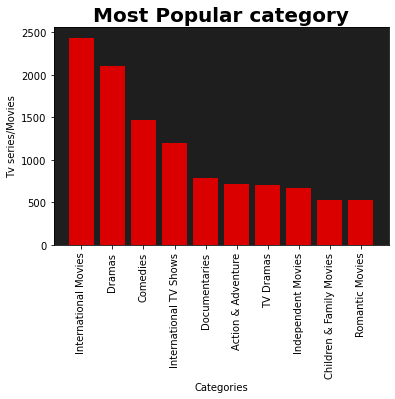

In [69]:
height = list(categories_dict.values())[:10]
bars = list(categories_dict.keys())[:10]
y_pos = np.arange(len(bars))

plt.bar(y_pos, height,color = theme['red'])
ax = plt.axes()
ax.set_facecolor(theme['dark_gray'])
plt.xlabel('Categories') 
plt.xticks(y_pos, bars)
plt.ylabel('Tv series/Movies') 
plt.title('Most Popular category',fontsize=20, fontweight='bold') 

plt.xticks(rotation=90)

plt.show()

Let's check out how Netflix chooses their release month. We can see that the most shows are released during the late-autumn and early-winter, which is quite intuitive, since that's when most people tend to stay at home watching TV. 

Most shows are released during <b>December</b>, when the winter holidays are, with most people being out-of-office for the two weeks between Christmas and New Years Eve. October coming in as the second most preferred month might come as a surprise, but it's explainable by the fact that the US is the main market and producer for Netflix (see the plots below), and October it's the month of Halloween. and the start of the period when people tend to stay at home and watch TV because it gets colder outside.

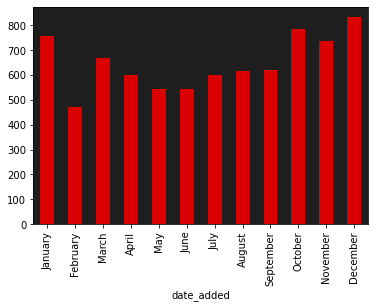

In [70]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])
months = ['January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plot = (netflix_df.groupby(netflix_df['date_added'].dt.strftime('%B'))['show_id'].count().reindex(months).plot.bar(color=theme['red'])
)
plot.set_facecolor(theme['dark_gray'])



In [71]:
netflix_df_filtered = netflix_df
netflix_df_filtered['year'] = netflix_df['date_added'].dt.year.astype('Int64')
netflix_df_filtered['month'] = netflix_df['date_added'].dt.strftime('%B')
netflix_df_filtered = netflix_df_filtered.sort_values(by='month')
netflix_df_filtered = netflix_df_filtered.loc[(netflix_df_filtered['year'] >= 2017) & (netflix_df_filtered['year'] <= 2020)]
netflix_df_filtered.dropna(subset = ["year"], inplace=True)

netflix_pivot = pd.pivot_table(
netflix_df_filtered,
values = 'show_id', index='year', columns='month', aggfunc='count', fill_value=0)
netflix_pivot = netflix_pivot.reindex(months, axis=1)
netflix_pivot = netflix_pivot.T

If we analyze the shows released in the last 4 years by their month of release, we can see that the tendency to release more shows during the autumn is persistent among the 4 years analyzed. We can see the effects of the Coronavirus in 2020, because the momentum gained at the end of 2019 went downhill by april 2020, because filming was canceled for lots of shows and movies. However, Netflix kept their tendency to release more shows in december, even if the number was lower than the one reached in 2019 and 2018.

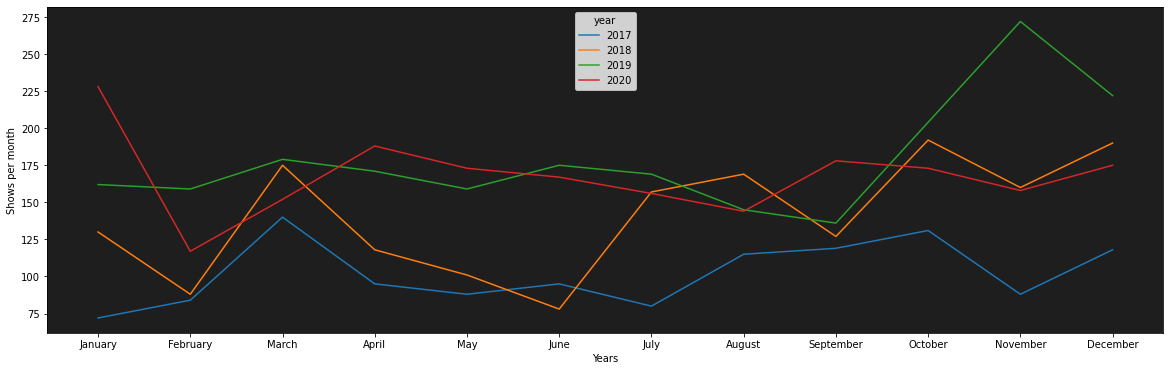

In [72]:
ax = netflix_pivot.plot(kind="line")
fig = ax.get_figure()
fig.set_size_inches(20, 6)
locs, labels = plt.xticks()

plt.xticks( np.arange(12), ('January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December') )
ax.set_xlabel("Years")
ax.set_ylabel("Shows per month")
ax.set_facecolor(theme['dark_gray'])

plt.show()

In [73]:
netflix_df_copy.dropna(subset = ["description"], inplace=True)
all_descriptions = " ".join(description for description in netflix_df_copy.description)
all_descriptions = all_descriptions.replace(',', '')

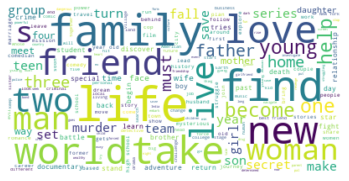

In [74]:
wordcloud = WordCloud(background_color="white").generate(all_descriptions)
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

This is a wordcloud of the most used words in the descriptions of the shows on Netflix. We can see that among the most used words we can find 'life, world, family and love', which correspond to non-fantasy shows. 'Teen' is another important keyword, because that indicated Netflix's tendency to create more shows oriented towards teens - confirmed also by words like 'young, student'. 

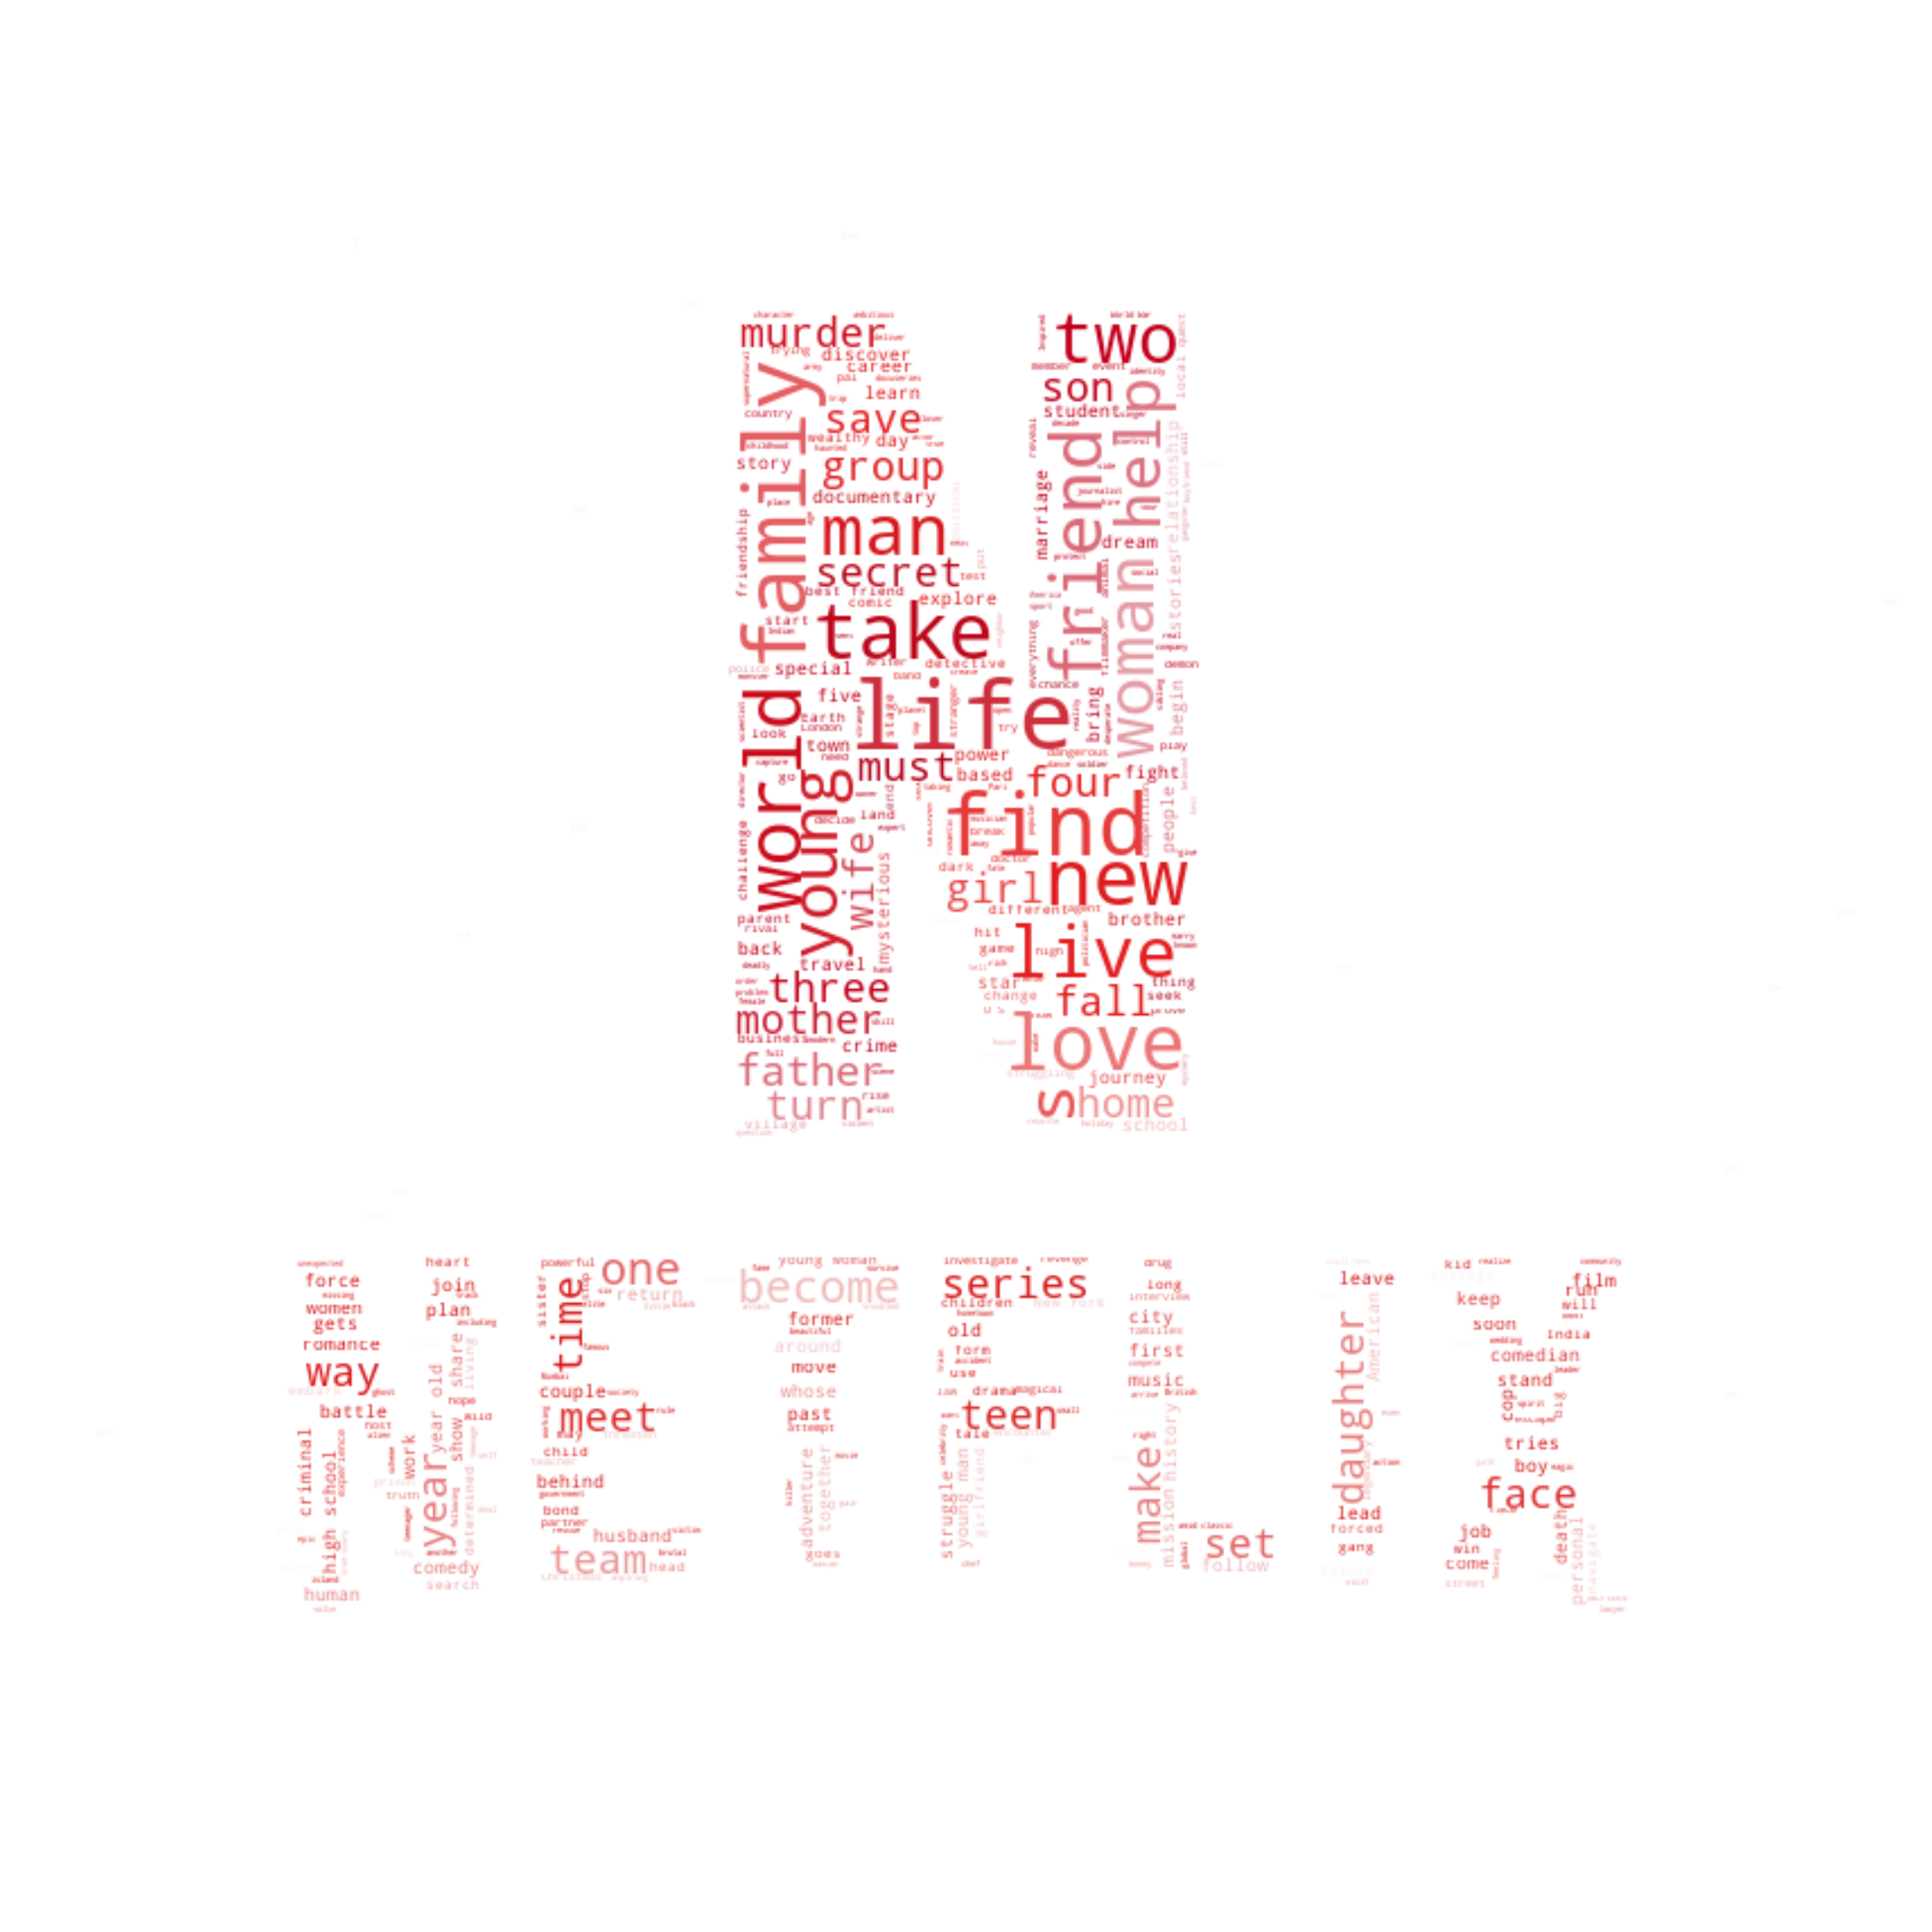

In [75]:
from PIL import Image

mask = np.array(Image.open('netflix_1.png'))
wordcloud_image = WordCloud(background_color="white", mode="RGBA", max_words=2000, mask=mask, width=5200, height=3600).generate(all_descriptions)

image_generator = ImageColorGenerator(mask)
plt.figure(figsize=[40,50])
plt.axis("off")
plt.imshow(wordcloud_image.recolor(color_func=image_generator), interpolation="bilinear")

In [76]:
#netflix_df_copy.head()

In [77]:
netflix_pivot_year = pd.pivot_table(
netflix_df_copy,
values = 'show_id', index='type', columns='year', aggfunc='count', fill_value=0)
netflix_pivot_year.head()
#netflix_pivot_year.dtypes 

year     2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
type                                                                        
Movie       1     2     1    13     3     6    19    58   258   864  1255   
TV Show     1     0     0     0     0     5     6    30   185   361   430   

year     2019  2020  2021  
type                       
Movie    1497  1312    88  
TV Show   656   697    29

It seems like the production and aquisition of Netflix shows really took off in 2016, with the company's growth taking a toll in 2020, affected by the Covid-19 pandemic. 

<p>It looks like Netflix choose to focus themselves on movies, rather than TV shows, which seems kind of counterintuitive, because Netflix tends to be known by the TV shows they produce. However, this can be explained by the fact that Netflix usually  buys the rights for lots of successful (or less so ) movies produced by others, and much less so for TV shows, which are more frequently created in-house. </p>
    
 <p> Arguably, one might say that the  TV shows produced in house are way more successful than their movies  (compare <i>Stranger Things, The Crown, The Witcher </i> with movies such as <i>The Platform, The Irishman, Bird Box </i>). <p>

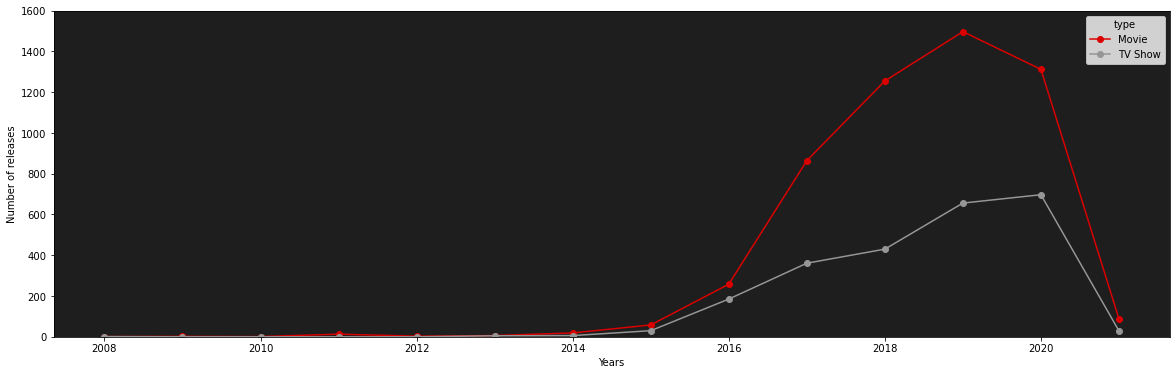

In [78]:
ax = netflix_pivot_year.T.plot(kind="line", ylim=(0, 1600), marker='o', color=[theme['red'], theme['light_gray']])
#ax.ylim  = (0, 5000)
fig = ax.get_figure()
fig.set_size_inches(20, 6)
#fig.patch.set_facecolor('black')
locs, labels = plt.xticks()

#plt.xticks( np.arange(4), ('January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December') )
ax.set_xlabel("Years")
ax.set_ylabel("Number of releases")
ax.set_facecolor(theme['dark_gray'])

plt.show()

In [79]:
country_one_hot_df=netflix_df_copy[["country"]]
country_one_hot_df.reset_index(drop=True, inplace=True)
country_one_hot_df = pd.concat([country_one_hot_df.drop('country', 1), country_one_hot_df['country'].str.get_dummies(sep=",")], 1)

country_count_df = country_one_hot_df.agg(['sum'])
country_one_hot_df_wo_index = pd.DataFrame()
country_one_hot_df_wo_index = country_one_hot_df_wo_index.append(country_count_df, ignore_index=True, )
country_one_hot_df_wo_index.reset_index(drop=True, inplace=True)

columns = country_one_hot_df_wo_index.columns
columns_no_space = []
for column in columns:
    if column[0] == ' ':
        column = column[1:]
    
    columns_no_space.append(column)

final_df = pd.DataFrame(columns_no_space, columns =['country'])
final_df['count'] = country_one_hot_df_wo_index.T.values
#print(final_df)


Let's now have a look at the most productive countries when it comes to shows shown on Netflix. It comes to no surprise that the US is by far the country where most Netflix's shows come from. 

<p> However, India occupying the second position is somewhat surprising for an european viewer, whose recommendations tend not to contain indian productions. However, India it's a very important market for Netflix (they entered the indian market in 2016 and have grown exponentially since). They have done so by making quality shows too, winning an Emmy prize with Delhi Crime. Despite that, Netflix still leads a battle between quality and quantity, which is helped by the Indian Internet becoming cheaper and cheaper. This makes access to Netflix more easier to less educated parts of the Indian population, which is satisfied by shows of a lesser quality.</p>

<p> Romania has 12 shows currently on Netflix. That's 3 more than Hungary and Bulgaria, but 3 times less than the 36 shows of Poland, for instance </p>

In [80]:
fig = px.treemap(final_df, 
                 path=['country'], 
                 values='count',
                )
fig.show()

In [81]:
# week urmatoare

netflix_df_2 = netflix_df
netflix_df_2['type_name'] = netflix_df_2['type']
netflix_df_2['type'].replace(to_replace=['TV Show', 'Movie'], value=[1, 2], inplace=True)
netflix_df_2



show_id  type                                    title  \
0         s1     1                                       3%   
1         s2     2                                     7:19   
2         s3     2                                    23:59   
3         s4     2                                        9   
4         s5     2                                       21   
...      ...   ...                                      ...   
7782   s7783     2                                     Zozo   
7783   s7784     2                                   Zubaan   
7784   s7785     2                        Zulu Man in Japan   
7785   s7786     1                    Zumbo's Just Desserts   
7786   s7787     2  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country date_added  \
0                                                Brazil 2020-08-14   
1                                                Mexico 2016-12-23   
2                                             Singapore 2018-12-20   
3                                         United States 2017-11-16   
4                                         United States 2020-01-01   
...                                                 ...        ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar... 2020-10-19   
7783                                              India 2019-03-02   
7784                                                NaN 2020-09-25   
7785                                          Australia 2020-10-31   
7786              United Kingdom, Canada, United States 2020-03-01   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  year      month  \
0     In a future where the elite inhabit an island ...  2020     August   
1     After a devastating earthquake hits Mexico Cit...  2016   December   
2     When an army recruit is found dead, his fellow

For now, there are is a much bigger number of movies than TV shows in the Netflix catalogue. However, this thing is starting to change as the available time for watching TV shrinks. People nowadays have less and less consecutive minutes to watch TV because of the busy schedule of the modern world. That translates into a higher interest for TV shows, because it's much more feasible to find 50 free minutes every night rather than 100 consecutive minutes (the average length of a movie).  <a href="https://www.cinemablend.com/television/2486360/netflix-now-has-more-tv-shows-but-fewer-movies-than-5-years-ago-smart-trend" target="_blank">Source</a> 

In [85]:
# labels = ['Movie', 'TV Show']
# values = [netflix_df.type, netflix_df.type_name]

# fig = go.Figure(data=[
#     go.Pie(labels=labels,
#            values=values,
#            marker_colors=[theme['light_gray'], theme['red']])
# ])
# fig.update_layout(
#     paper_bgcolor=theme['dark_gray'],
#     plot_bgcolor=theme['dark_gray'],
#     font_color="white",
#     title={
#         'text': "Number of productions with specified country",
#         'y': 0.95,
#         'x': 0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'
#     },
# )
# fig.show()

fig = px.pie(netflix_df, values='type', names='type_name',  
             color_discrete_map={'Movie': theme['light_gray'],
                                 'TV Show':theme['red'],})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

We've decided to search the most appreciated shows currenty on Netflix. We considered that Imdb is a relevant source for ratings given by users, so we downloaded a CSV with the ratings from <a href="https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset" target="_blank">Kaggle</a>. 

<p> Afterwards, we joined the two dataframes by the shows' title and that's how we found the first 15 most appreciated shows by Netflix fans all around the world </p>

In [86]:
ratings_from_imdb = pd.read_csv('IMDb_ratings.csv')
titles_from_imdb = pd.read_csv('IMDb_movies.csv')

#titles_from_imdb = titles_from_imdb[['title', 'year', 'genre']]
#ratings_from_imdb

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [87]:
ratings_df = pd.DataFrame({'title' : titles_from_imdb.title, 'rating': ratings_from_imdb.weighted_average_vote, 'genre': titles_from_imdb.genre, 'year': titles_from_imdb.year})

ratings_df.drop_duplicates(subset=['title', 'year', 'genre'], inplace=True)
ratings_df.dropna()

title  rating                      genre  year
0                          Miss Jerry     5.9                    Romance  1894
1         The Story of the Kelly Gang     6.1    Biography, Crime, Drama  1906
2                      Den sorte drøm     5.8                      Drama  1911
3                           Cleopatra     5.2             Drama, History  1912
4                           L'Inferno     7.0  Adventure, Drama, Fantasy  1911
...                               ...     ...                        ...   ...
85850                         Le lion     5.3                     Comedy  2020
85851  De Beentjes van Sint-Hildegard     7.7              Comedy, Drama  2020
85852       Padmavyuhathile Abhimanyu     7.9                      Drama  2019
85853               Sokagin Çocuklari     6.4              Drama, Family  2019
85854      La vida sense la Sara Amat     6.7                      Drama  2019

[85843 rows x 4 columns]

<i> Breakout </i>, one of the most appreciated TV Series currently on Netflix, had no country of origin in the initial Netflix dataframe. So, in order for the plot to look nice, we manually added the country where it was produced - which is Singapore.

In [88]:
netflix_imdb = ratings_df.merge(netflix_df, left_on='title', right_on='title', how='inner')
netflix_imdb = netflix_imdb.sort_values(by='rating_x', ascending=False)
netflix_imdb['country'] = np.where((netflix_imdb.title == 'Breakout'),'Singapore',netflix_imdb.country)
netflix_imdb.dropna()

title  rating_x                      genre year_x  \
990                 Innocent       9.0                     Comedy   2017   
397             Pulp Fiction       8.9               Crime, Drama   1994   
379         Schindler's List       8.9  Biography, Drama, History   1993   
1298               Inception       8.8  Action, Adventure, Sci-Fi   2010   
1664  Much Ado About Nothing       8.6            Comedy, Romance   2011   
...                      ...       ...                        ...    ...   
844                The Vault       1.9                     Action   2005   
581               Himmatwala       1.7             Action, Comedy   2013   
1685     Welcome to New York       1.6              Comedy, Drama   2018   
2188                 Aerials       1.6    Drama, Sci-Fi, Thriller   2016   
1203                    Pink       1.6              Comedy, Drama   2016   

     show_id  type                       director  \
990    s3009     1                     Seren Yüce   
397    s5003     2              Quentin Tarantino   
379    s5431     2               Steven Spielberg   
1298   s2980     2              Christopher Nolan   
1664   s4266     2  Alejandro Fernández Almendras   
...      ...   ...                            ...   
844    s6978     2                       Dan Bush   
581    s2744     2                     Sajid Khan   
1685   s7528     2                   Abel Ferrara   
2188    s319     2                     S.A. Zaidi   
1203   s4863     2        Aniruddha Roy Chowdhury   

                                                   cast  \
990   Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...   
397   John Travolta, Samuel L. Jackson, Uma Thurman,...   
379   Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...   
1298  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...   
1664  Agustín Silva, Paulina García, Daniel Alcaíno,...   
...                                                 ...   
844   Taryn Manning, Francesca Eastwood, James Franc...   
581   Ajay Devgn, Tamannaah Bhatia, Paresh Rawal, Za...   
1685  Gérard Depardieu, Jacqueline Bisset, Marie Mou...   
2188  Saga Alyasery, Ana Druzhynina, Mansour Al Fele...   
1203  Tapsee Pannu, Kirti Kulhari, Andrea Tariang, A...   

                            country date_added  release_year rating_y  \
990                          Turkey 2019-01-23          2017    TV-MA   
397                   United States 2019-01-01          1994        R   
379                   United States 2018-04-01          1993        R   
1298  United States, United Kingdom 2020-01-01          2010    PG-13   
1664   Chile, United States, France 2016-10-01          2016    TV-MA   
...                             ...        ...           ...      ...   
844                   United States 2018-01-01          2017    TV-MA   
581                           India 2018-11-01          2013    TV-14   
1685          United States, France 2017-03-23          2014        R   
2188           United Arab Emirates 2020-05-07          2016    TV-14   
1203                          India 2017-01-20          2016    TV-14   

      duration                                          listed_in  \
990   1 Season  Crime TV Shows, International TV Shows, TV Dramas   
397    154 min                Classic Movies, Cult Movies, Dramas   
379    195 min                             Classic Movies, Dramas   
1298   148 min    Action & Adventure, Sci-Fi & Fantasy, Thrillers   
1664    96 min   Dramas, Independent Movies, International Movies   
...        ...                                                ...   
844     92 min                           Horror Movies, Thrillers   
581    140 min  Action & Adventure, Comedies, International Mo...   
1685   108 min                         Dramas, Independent Movies   
2188    90 min             International Movies, Sci-Fi & Fantasy   
1203   130 min                       Dramas, International Movies   

                                            description  y

I think the most suprising part of this plot is the batch of Indian shows with a rating of around 8.5 or 8.6. The Netflix investments in India have payed off, the shows filmed there having a very high rating on Imdb. 

<p> Another interesting thing is that the high rated foreign (non-european or US shows) have not got into the european culture. I for instance, never heard of the highest rated shows on Netflix (Innocent and Breakout), even though <i>Pulp Fiction, Schindler's List </i> and <i>Inception</i> (3rd, 4th and 5th placed are considered classics in the european culture). Judging by the Imdb rating, this shows must be good, but they are struggling to become known into the european space. </p>

In [89]:
fig = px.sunburst(
    netflix_imdb[0:15],
    path=['title','country'],
    values='rating_x',
    color='rating_x')
fig.show()

In [89]:
movies=netflix_df[netflix_df['type_name']=='Movie'].copy()

#netflix_df
movies['duration'] = movies['duration'].str.replace(' min','')
movies['duration'] = movies['duration'].astype(str).astype(int)
#movies['duration']

We wanted to check the hypothesis (<a href="https://towardsdatascience.com/are-new-movies-longer-than-they-were-10hh20-50-year-ago-a35356b2ca5b" target="_blank">Source</a>) that the average length of movies is around 100 minutes. We have confirmed the hypothesis, with the most frequent duration being around 85 minutes. We think that's explainable because Netflix has lots of movies 'made for TV', which are usually much shorter than the ones produced especially for cinema. Think of Tarantino's movies, which are, on average 140 minutes long, or about Marvel movies (an average of 130 minutes as of 2019  (<a href="https://www.quora.com/What-is-the-total-runtime-of-all-the-Marvel-films-in-the-MCU-so-far-released." target="_blank">Source</a>)


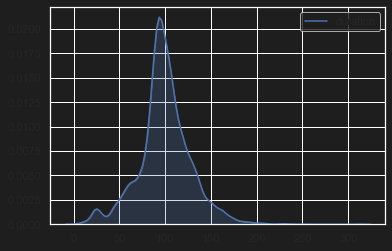

In [92]:
# sns.set(style="darkgrid")
# sns.set(rc={'axes.facecolor':theme['dark_gray'], 'figure.facecolor':theme['dark_gray']})
# sns.kdeplot(data=movies['duration'], shade=True, legend=True)